# Control Data

## Generator to Oscilloscope

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from myfft import myfft


In [111]:
import peakutils
from peakutils import indexes, peak

def gaussian(x, amplitude, mean, stddev):
    y = amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))
    return y

def FWHM(x,y):
    
    fits = peakutils.peak.gaussian_fit(x, y, center_only=False)
    x_new = np.linspace(x[0],x[-1],100)
    gaus_y = gaussian(x_new,fits[0], fits[1], fits[2])
    
    # Find the indices of the peaks
    peak_indices = indexes(gaus_y, thres=0.5, min_dist=1)

    # Get the index of the highest peak
    max_index = peak_indices[np.argmax(gaus_y[peak_indices])]

    # Calculate the FWHM
    half_max = gaus_y[max_index] / 2.0
    left_index = np.argmin(np.abs(gaus_y[:max_index] - half_max))
    right_index = np.argmin(np.abs(gaus_y[max_index:] - half_max)) + max_index
    fwhm = x_new[right_index] - x_new[left_index]
    
    # Find central frequency from peak index:
    central_freq = x_new[max_index]

    print("Peak Index:", max_index)
    print("Central Frequency:", central_freq)
    print("FWHM:", fwhm)
    print("")
    return x_new,gaus_y, max_index, central_freq, fwhm

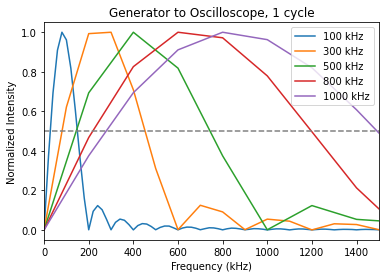

In [2]:
exec(open('ComputeDelays.py').read())
GS100=timedata('GS100')
readlabdat('may16_1.csv',GS100)
GS300=timedata('GS300')
readlabdat('may16_2.csv',GS300)
GS500=timedata('GS500')
readlabdat('may16_3.csv',GS500)
GS800=timedata('GS800')
readlabdat('may16_4.csv',GS800)
GS1000=timedata('GS1000')
readlabdat('may16_5.csv',GS1000)

f1,FT1=myfft(GS100.time, GS100.data)
f2,FT2=myfft(GS300.time, GS300.data)
f3,FT3=myfft(GS500.time, GS500.data)
f4,FT4=myfft(GS800.time, GS800.data)
f5,FT5=myfft(GS1000.time, GS1000.data)


plt.title('Generator to Oscilloscope, 1 cycle')
plt.plot(f1,np.abs(FT1)/max(np.abs(FT1)),label='100 kHz')
plt.plot(f2,np.abs(FT2)/max(np.abs(FT2)),label='300 kHz')
plt.plot(f3,np.abs(FT3)/max(np.abs(FT3)),label='500 kHz')
plt.plot(f4,np.abs(FT4)/max(np.abs(FT4)),label='800 kHz')
plt.plot(f5,np.abs(FT5)/max(np.abs(FT5)),label='1000 kHz')
plt.axhline(y = 0.5, color = 'grey', linestyle = '--')
plt.xlim([0,1500])
plt.legend(loc=1)
plt.ylabel('Normalized Intensity')
plt.xlabel('Frequency (kHz)')
plt.savefig('Figures\Gen_Scope_1FFT.jpeg', dpi=300)


In [ ]:
# Frequency at peak (Hz):
print(f1[np.argmax(np.abs(FT1))])
print(f2[np.argmax(np.abs(FT2))])
print(f3[np.argmax(np.abs(FT3))])
print(f4[np.argmax(np.abs(FT4))])
print(f5[np.argmax(np.abs(FT5))])


In [ ]:
plt.plot(GS100.time, GS100.data, label="100 kHz")
plt.plot(GS300.time, GS300.data, label="300 kHz")
plt.plot(GS500.time, GS500.data, label="500 kHz")
plt.plot(GS800.time, GS800.data, label="800 kHz")
plt.plot(GS1000.time, GS1000.data, label="1000 kHz")
plt.legend()
plt.xlim([-0.2e-6,2.5e-6])
plt.xlabel("Time (s)")
plt.ylabel('Amplitude (V)')
plt.title('Generator to Oscilloscope, 1 cycle')
plt.savefig('Figures\Gen_Scope_1.jpeg', dpi=300)

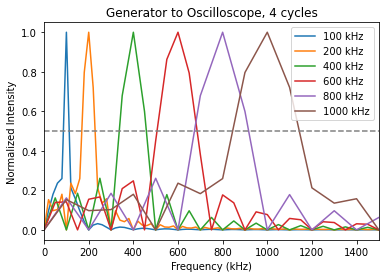

In [112]:
GS100_4=timedata('GS100_4')
readlabdat('feb1_6.csv',GS100_4)
GS200_4=timedata('GS200_4')
readlabdat('feb1_7.csv',GS200_4)
GS400_4=timedata('GS400_4')
readlabdat('feb1_8.csv',GS400_4)
GS600_4=timedata('GS600_4')
readlabdat('feb1_9.csv',GS600_4)
GS800_4=timedata('GS800_4')
readlabdat('feb1_10.csv',GS800_4)
GS1000_4=timedata('GS1000_4')
readlabdat('feb1_11.csv',GS1000_4)

f1_4,FT1_4=myfft(GS100_4.time, GS100_4.data)
f2_4,FT2_4=myfft(GS200_4.time, GS200_4.data)
f3_4,FT3_4=myfft(GS400_4.time, GS400_4.data)
f4_4,FT4_4=myfft(GS600_4.time, GS600_4.data)
f5_4,FT5_4=myfft(GS800_4.time, GS800_4.data)
f6_4,FT6_4=myfft(GS1000_4.time, GS1000_4.data)

plt.title('Generator to Oscilloscope, 4 cycles')
plt.plot(f1_4,np.abs(FT1_4)/max(np.abs(FT1_4)),label='100 kHz')
plt.plot(f2_4,np.abs(FT2_4)/max(np.abs(FT2_4)),label='200 kHz')
plt.plot(f3_4,np.abs(FT3_4)/max(np.abs(FT3_4)),label='400 kHz')
plt.plot(f4_4,np.abs(FT4_4)/max(np.abs(FT4_4)),label='600 kHz')
plt.plot(f5_4,np.abs(FT5_4)/max(np.abs(FT5_4)),label='800 kHz')
plt.plot(f6_4,np.abs(FT6_4)/max(np.abs(FT6_4)),label='1000 kHz')
plt.axhline(y = 0.5, color = 'grey', linestyle = '--')
plt.xlim([0,1500])
plt.legend()
plt.ylabel('Normalized Intensity')
plt.xlabel('Frequency (kHz)')
plt.savefig('Figures/Gen_Scope_4cycleFFT.jpeg', dpi=300)

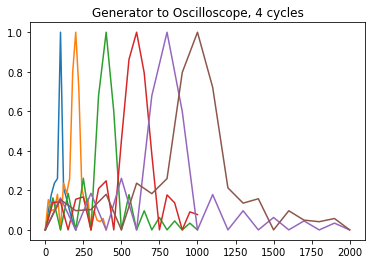

In [116]:
plt.title('Generator to Oscilloscope, 4 cycles')
plt.plot(f1_4[1000:1011],np.abs(FT1_4[1000:1011])/max(np.abs(FT1_4[1000:1011])),label='100 kHz')
plt.plot(f2_4[1000:1021],np.abs(FT2_4[1000:1021])/max(np.abs(FT2_4[1000:1021])),label='200 kHz')
plt.plot(f3_4[1000:1021],np.abs(FT3_4[1000:1021])/max(np.abs(FT3_4[1000:1021])),label='400 kHz')
plt.plot(f4_4[1000:1021],np.abs(FT4_4[1000:1021])/max(np.abs(FT4_4[1000:1021])),label='600 kHz')
plt.plot(f5_4[1000:1021],np.abs(FT5_4[1000:1021])/max(np.abs(FT5_4[1000:1021])),label='800 kHz')
plt.plot(f6_4[1000:1021],np.abs(FT6_4[1000:1021])/max(np.abs(FT6_4[1000:1021])),label='1000 kHz')

In [108]:
# Frequency at peak (Hz):
print(f1_4[np.argmax(np.abs(FT1_4))])
print(f2_4[np.argmax(np.abs(FT2_4))])
print(f3_4[np.argmax(np.abs(FT3_4))])
print(f4_4[np.argmax(np.abs(FT4_4))])
print(f5_4[np.argmax(np.abs(FT5_4))])
print(f6_4[np.argmax(np.abs(FT6_4))])

-100.00000000000095
-200.0000000000019
-400.00000000000387
-600.0000000000058
-800.0000000000077
1000.0000000000095


In [109]:
print(f1_4[1]-f1_4[0])
print(f2_4[1]-f2_4[0])
print(f3_4[1]-f3_4[0])
print(f4_4[1]-f4_4[0])
print(f5_4[1]-f5_4[0])
print(f6_4[1]-f6_4[0])

20.0
20.0
50.0
50.0
100.0
100.0


In [148]:
print('100kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f1_4[1000:1011],np.abs(FT1_4[1000:1011])/max(np.abs(FT1_4[1000:1011])))
print('200kHz')
x2,gaus2,index2, central2, fwhm2 = FWHM(f2_4[1000:1021],np.abs(FT2_4[1000:1021])/max(np.abs(FT2_4[1000:1021])))
print('400kHz')
x3,gaus3,index3, central3, fwhm3 = FWHM(f3_4[1000:1021],np.abs(FT3_4[1000:1021])/max(np.abs(FT3_4[1000:1021])))
print('600kHz')
x4,gaus4,index4, central4, fwhm4 = FWHM(f4_4[1000:1021],np.abs(FT4_4[1000:1021])/max(np.abs(FT4_4[1000:1021])))
print('800kHz')
x5,gaus5,index5, central5, fwhm5 = FWHM(f5_4[1000:1021],np.abs(FT5_4[1000:1021])/max(np.abs(FT5_4[1000:1021])))
print('1000kHz')
x6,gaus6,index6, central6, fwhm6 = FWHM(f6_4[1000:1021],np.abs(FT6_4[1000:1021])/max(np.abs(FT6_4[1000:1021])))

100kHz
Peak Index: 49
Central Frequency: 98.98989898989993
FWHM: 28.28282828282856

200kHz
Peak Index: 49
Central Frequency: 197.97979797979986
FWHM: 64.64646464646526

400kHz
Peak Index: 39
Central Frequency: 393.93939393939775
FWHM: 111.11111111111222

600kHz
Peak Index: 59
Central Frequency: 595.9595959596016
FWHM: 161.61616161616314

800kHz
Peak Index: 39
Central Frequency: 787.8787878787955
FWHM: 222.22222222222445

1000kHz
Peak Index: 49
Central Frequency: 989.8989898989994
FWHM: 323.2323232323264



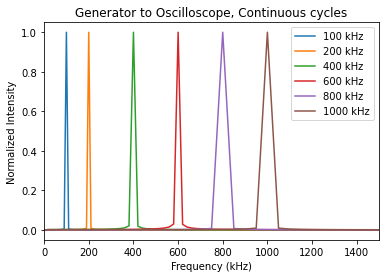

In [118]:
GS100_C=timedata('GS100_C')
readlabdat('feb1_0.csv',GS100_C)
GS200_C=timedata('GS200_C')
readlabdat('feb1_1.csv',GS200_C)
GS400_C=timedata('GS400_C')
readlabdat('feb1_2.csv',GS400_C)
GS600_C=timedata('GS600_C')
readlabdat('feb1_3.csv',GS600_C)
GS800_C=timedata('GS800_C')
readlabdat('feb1_4.csv',GS800_C)
GS1000_C=timedata('GS1000_C')
readlabdat('feb1_5.csv',GS1000_C)

f1_C,FT1_C=myfft(GS100_C.time, GS100_C.data)
f2_C,FT2_C=myfft(GS200_C.time, GS200_C.data)
f3_C,FT3_C=myfft(GS400_C.time, GS400_C.data)
f4_C,FT4_C=myfft(GS600_C.time, GS600_C.data)
f5_C,FT5_C=myfft(GS800_C.time, GS800_C.data)
f6_C,FT6_C=myfft(GS1000_C.time, GS1000_C.data)

plt.title('Generator to Oscilloscope, Continuous cycles')
plt.plot(f1_C,np.abs(FT1_C)/max(np.abs(FT1_C)),label='100 kHz')
plt.plot(f2_C,np.abs(FT2_C)/max(np.abs(FT2_C)),label='200 kHz')
plt.plot(f3_C,np.abs(FT3_C)/max(np.abs(FT3_C)),label='400 kHz')
plt.plot(f4_C,np.abs(FT4_C)/max(np.abs(FT4_C)),label='600 kHz')
plt.plot(f5_C,np.abs(FT5_C)/max(np.abs(FT5_C)),label='800 kHz')
plt.plot(f6_C,np.abs(FT6_C)/max(np.abs(FT6_C)),label='1000 kHz')
plt.xlim([0,1500])
plt.legend()
plt.ylabel('Normalized Intensity')
plt.xlabel('Frequency (kHz)')
plt.savefig('Figures/Gen_Scope_Cont.jpeg', dpi=300)

In [ ]:
print(f1_C[1]-f1_C[0])
print(f2_C[1]-f2_C[0])
print(f3_C[1]-f3_C[0])
print(f4_C[1]-f4_C[0])
print(f5_C[1]-f5_C[0])
print(f6_C[1]-f6_C[0])

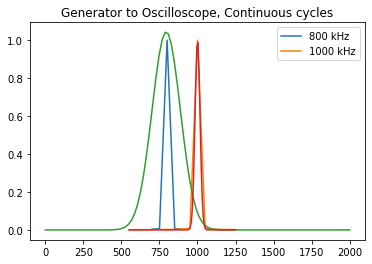

In [147]:
plt.title('Generator to Oscilloscope, Continuous cycles')
#plt.plot(f1_C[1000:1021],np.abs(FT1_C[1000:1021])/max(np.abs(FT1_C[1000:1021])),label='100 kHz')
#plt.plot(f2_C[1000:1021],np.abs(FT2_C[1000:1021])/max(np.abs(FT2_C[1000:1021])),label='200 kHz')
#plt.plot(f3_C[1000:1041],np.abs(FT3_C[1000:1041])/max(np.abs(FT3_C[1000:1041])),label='400 kHz')
#plt.plot(f4_C[1000:1041],np.abs(FT4_C[1000:1041])/max(np.abs(FT4_C[1000:1041])),label='600 kHz')
plt.plot(f5_C[1013:1018],np.abs(FT5_C[1013:1018])/max(np.abs(FT5_C[1013:1018])),label='800 kHz')
plt.plot(f6_C[1010:1025],np.abs(FT6_C[1010:1025])/max(np.abs(FT6_C[1010:1025])),label='1000 kHz')
plt.plot(x5,gaus5)
plt.plot(x6,gaus6)
plt.legend()

In [145]:
print('100kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f1_C[1000:1011],np.abs(FT1_C[1000:1011])/max(np.abs(FT1_C[100:1011])))
print('200kHz')
x2,gaus2,index2, central2, fwhm2 = FWHM(f2_C[1000:1021],np.abs(FT2_C[1000:1021])/max(np.abs(FT2_C[1000:1021])))
print('400kHz')
x3,gaus3,index3, central3, fwhm3 = FWHM(f3_C[1000:1041],np.abs(FT3_C[1000:1041])/max(np.abs(FT3_C[1000:1041])))
print('600kHz')
x4,gaus4,index4, central4, fwhm4 = FWHM(f4_C[1000:1041],np.abs(FT4_C[1000:1041])/max(np.abs(FT4_C[1000:1041])))
print('800kHz')
x5,gaus5,index5, central5, fwhm5 = FWHM(f5_C[1013:1018],np.abs(FT5_C[1013:1018])/max(np.abs(FT5_C[1013:1018])))
print('1000kHz')
x6,gaus6,index6, central6, fwhm6 = FWHM(f6_C[1010:1025],np.abs(FT6_C[1010:1025])/max(np.abs(FT6_C[1010:1025])))

100kHz
Peak Index: 89
Central Frequency: 99.94896438117807
FWHM: 7.074244192803306

200kHz
Peak Index: 94
Central Frequency: 199.99898939368188
FWHM: 8.084850506060889

400kHz
Peak Index: 47
Central Frequency: 400.198177975946
FWHM: 16.17779395557136

600kHz
Peak Index: 72
Central Frequency: 602.4206024205877
FWHM: 16.17779395557136

800kHz


ValueError: attempt to get argmax of an empty sequence

## Single Transducer - laser and reflective tape

In [ ]:
s2_50=timedata('s1_50')
readlabdat('jan17_8.csv',s2_50)
s2_100=timedata('s2_100')
readlabdat('jan17_9.csv',s2_100)
s2_200=timedata('s2_200')
readlabdat('jan17_10.csv',s2_200)

s1_50=timedata('s1_50')
readlabdat('jan17_19.csv',s1_50)
s1_100=timedata('s1_100')
readlabdat('jan17_11.csv',s1_100)
s1_200=timedata('s1_200')
readlabdat('jan17_12.csv',s1_200)

pu1_50=timedata('pu1_50')
readlabdat('jan17_13.csv',pu1_50)
pu1_100=timedata('pu1_100')
readlabdat('jan17_14.csv',pu1_100)
pu1_200=timedata('pu1_200')
readlabdat('jan17_15.csv',pu1_200)

pu2_50=timedata('pu2_50')
readlabdat('jan17_16.csv',pu2_50)
pu2_100=timedata('pu2_100')
readlabdat('jan17_17.csv',pu2_100)
pu2_200=timedata('pu2_200')
readlabdat('jan17_18.csv',pu2_200)

f_s1_50,FT_s1_50=myfft(s1_50.time,s1_50.data)
f_s1_100,FT_s1_100=myfft(s1_100.time,s1_100.data)
f_s1_200,FT_s1_200=myfft(s1_200.time,s1_200.data)

f_s2_50,FT_s2_50=myfft(s2_50.time,s2_50.data)
f_s2_100,FT_s2_100=myfft(s2_100.time,s2_100.data)
f_s2_200,FT_s2_200=myfft(s2_200.time,s2_200.data)

f_pu1_50,FT_pu1_50=myfft(pu1_50.time,pu1_50.data)
f_pu1_100,FT_pu1_100=myfft(pu1_100.time,pu1_100.data)
f_pu1_200,FT_pu1_200=myfft(pu1_200.time,pu1_200.data)

f_pu2_50,FT_pu2_50=myfft(pu2_50.time,pu2_50.data)
f_pu2_100,FT_pu2_100=myfft(pu2_100.time,pu2_100.data)
f_pu2_200,FT_pu2_200=myfft(pu2_200.time,pu2_200.data)

fig, axs = plt.subplots(2,2)

axs[0,0].plot(f_s1_50,np.abs(FT_s1_50)/max(np.abs(FT_s1_50)),label='50 kHz')
axs[0,0].plot(f_s1_100,np.abs(FT_s1_100)/max(np.abs(FT_s1_100)),label='100 kHz')
axs[0,0].plot(f_s1_200,np.abs(FT_s1_200)/max(np.abs(FT_s1_200)),label='200 kHz')
axs[0,0].set_title('Transmitting Probe (S1) ')
axs[0,0].set_xlim([0,300])
axs[0,0].legend()

axs[0,1].plot(f_s2_50,np.abs(FT_s2_50)/max(np.abs(FT_s2_50)),label='50 kHz')
axs[0,1].plot(f_s2_100,np.abs(FT_s2_100)/max(np.abs(FT_s2_100)),label='100 kHz')
axs[0,1].plot(f_s2_200,np.abs(FT_s2_200)/max(np.abs(FT_s2_200)),label='200 kHz')
axs[0,1].set_title('Receiving Probe (S2)')
axs[0,1].set_xlim([0,300])
axs[0,1].legend()

axs[1,0].plot(f_pu1_50,np.abs(FT_pu1_50)/max(np.abs(FT_pu1_50)),label='50 kHz')
axs[1,0].plot(f_pu1_100,np.abs(FT_pu1_100)/max(np.abs(FT_pu1_100)),label='100 kHz')
axs[1,0].plot(f_pu1_200,np.abs(FT_pu1_200)/max(np.abs(FT_pu1_200)),label='200 kHz')
axs[1,0].set_title('Transmitting Pump (Pu1)')
axs[1,0].set_xlim([0,300])
axs[1,0].legend()

axs[1,1].plot(f_pu2_50,np.abs(FT_pu2_50)/max(np.abs(FT_pu2_50)),label='50 kHz')
axs[1,1].plot(f_pu2_100,np.abs(FT_pu2_100)/max(np.abs(FT_pu2_100)),label='100 kHz')
axs[1,1].plot(f_pu2_200,np.abs(FT_pu2_200)/max(np.abs(FT_pu2_200)),label='200 kHz')
axs[1,1].set_title('Receiving Pump (Pu2)')
axs[1,1].set_xlim([0,300])
axs[1,1].legend()

for ax in axs.flat:
    ax.set(xlabel='Frequency (kHz)',ylabel='Intensity')


fig.tight_layout(pad=0.3, w_pad=0.2,h_pad=0.2)
fig.set_size_inches(15.0,10.0)
fig.savefig('Laser_SingleTrans_Plot.jpeg', dpi=400)

## Two Transducers - no couplant

In [ ]:
# P-wave transducers - 1 cycle
p12_100=timedata('p12_100')
readlabdat('apr27_1.csv',p12_100)
p12_300=timedata('p12_300')
readlabdat('apr27_2.csv',p12_300)
p12_500=timedata('p12_500')
readlabdat('apr27_3.csv',p12_500)
p12_800=timedata('p12_800')
readlabdat('apr27_4.csv',p12_800)
p12_1000=timedata('p12_1000')
readlabdat('apr27_5.csv',p12_1000)

f_p12_100,FT_p12_100=myfft(p12_100.time,p12_100.data)
f_p12_300,FT_p12_300=myfft(p12_300.time,p12_300.data)
f_p12_500,FT_p12_500=myfft(p12_500.time,p12_500.data)
f_p12_800,FT_p12_800=myfft(p12_800.time,p12_800.data)
f_p12_1000,FT_p12_1000=myfft(p12_1000.time,p12_1000.data)


plt.title('P-Wave Transducers, No Couplant, 1 cycle')
plt.plot(f_p12_100,np.abs(FT_p12_100)/max(np.abs(FT_p12_100)),label='100 kHz')
plt.plot(f_p12_300,np.abs(FT_p12_300)/max(np.abs(FT_p12_300)),label='300 kHz')
plt.plot(f_p12_500,np.abs(FT_p12_500)/max(np.abs(FT_p12_500)),label='500 kHz')
plt.plot(f_p12_800,np.abs(FT_p12_800)/max(np.abs(FT_p12_800)),label='800 kHz')
plt.plot(f_p12_1000,np.abs(FT_p12_1000)/max(np.abs(FT_p12_1000)),label='1000 kHz')

plt.xlim([0,1500])
plt.legend()
plt.ylabel('Intensity')
plt.xlabel('Frequency (kHz)')
plt.savefig('P12Trans_1cyc.jpeg', dpi=300)

In [ ]:
# P-wave transducers - 1 cycle
p12_100h=timedata('p12_100h')
readlabdat('apr27_21.csv',p12_100h)
p12_300h=timedata('p12_300h')
readlabdat('apr27_22.csv',p12_300h)
p12_500h=timedata('p12_500h')
readlabdat('apr27_23.csv',p12_500h)
p12_800h=timedata('p12_800h')
readlabdat('apr27_24.csv',p12_800h)
p12_1000h=timedata('p12_1000h')
readlabdat('apr27_25.csv',p12_1000h)

f_p12_100h,FT_p12_100h=myfft(p12_100h.time,p12_100h.data)
f_p12_300h,FT_p12_300h=myfft(p12_300h.time,p12_300h.data)
f_p12_500h,FT_p12_500h=myfft(p12_500h.time,p12_500h.data)
f_p12_800h,FT_p12_800h=myfft(p12_800h.time,p12_800h.data)
f_p12_1000h,FT_p12_1000h=myfft(p12_1000h.time,p12_1000h.data)


plt.title('P-Wave Transducers, 1 cycle')
plt.plot(f_p12_100h,np.abs(FT_p12_100h)/max(np.abs(FT_p12_100h)),label='100 kHz')
plt.plot(f_p12_300h,np.abs(FT_p12_300h)/max(np.abs(FT_p12_300h)),label='300 kHz')
plt.plot(f_p12_500h,np.abs(FT_p12_500h)/max(np.abs(FT_p12_500h)),label='500 kHz')
plt.plot(f_p12_800h,np.abs(FT_p12_800h)/max(np.abs(FT_p12_800h)),label='800 kHz')
plt.plot(f_p12_1000h,np.abs(FT_p12_1000h)/max(np.abs(FT_p12_1000h)),label='1000 kHz')

plt.xlim([0,1500])
plt.legend()
plt.ylabel('Intensity')
plt.xlabel('Frequency (kHz)')
plt.savefig('P12Trans_1cyc.jpeg', dpi=300)

## Probe transducers (S1&S2)

In [ ]:
pr100_4=timedata('pr100_4')
readlabdat('feb1_12.csv',pr100_4)
pr200_4=timedata('pr200_4')
readlabdat('feb1_13.csv',pr200_4)
pr400_4=timedata('pr400_4')
readlabdat('feb1_14.csv',pr400_4)
pr600_4=timedata('pr600_4')
readlabdat('feb1_15.csv',pr600_4)
pr800_4=timedata('pr800_4')
readlabdat('feb1_16.csv',pr800_4)
pr1000_4=timedata('pr1000_4')
readlabdat('feb1_17.csv',pr1000_4)

pr100_C=timedata('pr100_C')
readlabdat('feb1_18.csv',pr100_C)
pr200_C=timedata('pr200_C')
readlabdat('feb1_19.csv',pr200_C)
pr400_C=timedata('pr400_C')
readlabdat('feb1_20.csv',pr400_C)
pr600_C=timedata('pr600_C')
readlabdat('feb1_21.csv',pr600_C)
pr800_C=timedata('pr800_C')
readlabdat('feb1_22.csv',pr800_C)
pr1000_C=timedata('pr1000_C')
readlabdat('feb1_23.csv',pr1000_C)

f_pr100_4,FT_pr100_4=myfft(pr100_4.time,pr100_4.data)
f_pr200_4,FT_pr200_4=myfft(pr200_4.time,pr200_4.data)
f_pr400_4,FT_pr400_4=myfft(pr400_4.time,pr400_4.data)
f_pr600_4,FT_pr600_4=myfft(pr600_4.time,pr600_4.data)
f_pr800_4,FT_pr800_4=myfft(pr800_4.time,pr800_4.data)
f_pr1000_4,FT_pr1000_4=myfft(pr1000_4.time,pr1000_4.data)

f_pr100_C,FT_pr100_C=myfft(pr100_C.time,pr100_C.data)
f_pr200_C,FT_pr200_C=myfft(pr200_C.time,pr200_C.data)
f_pr400_C,FT_pr400_C=myfft(pr400_C.time,pr400_C.data)
f_pr600_C,FT_pr600_C=myfft(pr600_C.time,pr600_C.data)
f_pr800_C,FT_pr800_C=myfft(pr800_C.time,pr800_C.data)
f_pr1000_C,FT_pr1000_C=myfft(pr1000_C.time,pr1000_C.data)

plt.title('Probe Transducers, 4 cycles')
plt.plot(f_pr100_4,np.abs(FT_pr100_4)/max(np.abs(FT_pr100_4)),label='100 kHz')
plt.plot(f_pr200_4,np.abs(FT_pr200_4)/max(np.abs(FT_pr200_4)),label='200 kHz')
plt.plot(f_pr400_4,np.abs(FT_pr400_4)/max(np.abs(FT_pr400_4)),label='400 kHz')
plt.plot(f_pr600_4,np.abs(FT_pr600_4)/max(np.abs(FT_pr600_4)),label='600 kHz')
plt.plot(f_pr800_4,np.abs(FT_pr800_4)/max(np.abs(FT_pr800_4)),label='800 kHz')
plt.plot(f_pr1000_4,np.abs(FT_pr1000_4)/max(np.abs(FT_pr1000_4)),label='1000 kHz')

plt.xlim([0,1500])
plt.legend()
plt.ylabel('Intensity')
plt.xlabel('Frequency (kHz)')
plt.savefig('ProbeControl_4cyc.jpeg', dpi=300)

In [ ]:
plt.title('Probe Transducers, Continuous cycles')
plt.plot(f_pr100_C,np.abs(FT_pr100_C)/max(np.abs(FT_pr100_C)),label='100 kHz')
plt.plot(f_pr200_C,np.abs(FT_pr200_C)/max(np.abs(FT_pr200_C)),label='200 kHz')
plt.plot(f_pr400_C,np.abs(FT_pr400_C)/max(np.abs(FT_pr400_C)),label='400 kHz')
plt.plot(f_pr600_C,np.abs(FT_pr600_C)/max(np.abs(FT_pr600_C)),label='600 kHz')
plt.plot(f_pr800_C,np.abs(FT_pr800_C)/max(np.abs(FT_pr800_C)),label='800 kHz')
plt.plot(f_pr1000_C,np.abs(FT_pr1000_C)/max(np.abs(FT_pr1000_C)),label='1000 kHz')

plt.xlim([0,1500])
plt.legend()
plt.ylabel('Intensity')
plt.xlabel('Frequency (kHz)')
plt.savefig('ProbeControl_Cont.jpeg', dpi=300)

## PUMP transducers (Pu1&Pu2)

In [ ]:
pu50_4=timedata('pu50_4')
readlabdat('feb1_26.csv',pu50_4)
pu75_4=timedata('pu75_4')
readlabdat('feb1_27.csv',pu75_4)
pu100_4=timedata('pu100_4')
readlabdat('feb1_24.csv',pu100_4)
pu150_4=timedata('pu150_4')
readlabdat('feb1_28.csv',pu150_4)
pu200_4=timedata('pu200_4')
readlabdat('feb1_25.csv',pu200_4)

pu50_c=timedata('pu50_c')
readlabdat('feb1_29.csv',pu50_c)
pu75_c=timedata('pu75_c')
readlabdat('feb1_30.csv',pu75_c)
pu100_c=timedata('pu100_c')
readlabdat('feb1_31.csv',pu100_c)
pu150_c=timedata('pu150_c')
readlabdat('feb1_32.csv',pu150_c)
pu200_c=timedata('pu200_c')
readlabdat('feb1_33.csv',pu200_c)

f_pu50_4,FT_pu50_4=myfft(pu50_4.time,pu50_4.data)
f_pu75_4,FT_pu75_4=myfft(pu75_4.time,pu75_4.data)
f_pu100_4,FT_pu100_4=myfft(pu100_4.time,pu100_4.data)
f_pu150_4,FT_pu150_4=myfft(pu150_4.time,pu150_4.data)
f_pu200_4,FT_pu200_4=myfft(pu200_4.time,pu200_4.data)

f_pu50_c,FT_pu50_c=myfft(pu50_c.time,pu50_c.data)
f_pu75_c,FT_pu75_c=myfft(pu75_c.time,pu75_c.data)
f_pu100_c,FT_pu100_c=myfft(pu100_c.time,pu100_c.data)
f_pu150_c,FT_pu150_c=myfft(pu150_c.time,pu150_c.data)
f_pu200_c,FT_pu200_c=myfft(pu200_c.time,pu200_c.data)

plt.title('Pump Transducers, 4 cycles')
plt.plot(f_pu50_4,np.abs(FT_pu50_4)/max(np.abs(FT_pu50_4)),label='50 kHz')
plt.plot(f_pu75_4,np.abs(FT_pu75_4)/max(np.abs(FT_pu75_4)),label='75 kHz')
plt.plot(f_pu100_4,np.abs(FT_pu100_4)/max(np.abs(FT_pu100_4)),label='100 kHz')
plt.plot(f_pu150_4,np.abs(FT_pu150_4)/max(np.abs(FT_pu150_4)),label='150 kHz')
plt.plot(f_pu200_4,np.abs(FT_pu200_4)/max(np.abs(FT_pu200_4)),label='200 kHz')

plt.xlim([0,300])
plt.legend()
plt.ylabel('Intensity')
plt.xlabel('Frequency (kHz)')
plt.savefig('PUMPControl_4cyc.jpeg', dpi=300)

In [ ]:
plt.title('Pump Transducers, Continuous cycles')
plt.plot(f_pu50_c,np.abs(FT_pu50_c)/max(np.abs(FT_pu50_c)),label='50 kHz')
plt.plot(f_pu75_c,np.abs(FT_pu75_c)/max(np.abs(FT_pu75_c)),label='75 kHz')
plt.plot(f_pu100_c,np.abs(FT_pu100_c)/max(np.abs(FT_pu100_c)),label='100 kHz')
plt.plot(f_pu150_c,np.abs(FT_pu150_c)/max(np.abs(FT_pu150_c)),label='150 kHz')
plt.plot(f_pu200_c,np.abs(FT_pu200_c)/max(np.abs(FT_pu200_c)),label='200 kHz')

plt.xlim([0,300])
plt.legend()
plt.ylabel('Intensity')
plt.xlabel('Frequency (kHz)')
plt.savefig('PUMPControl_Cont.jpeg', dpi=300)

# Motivation Plot - Jacobs Data

Text(0.5, 1.0, 'Probe Frequency Testing')

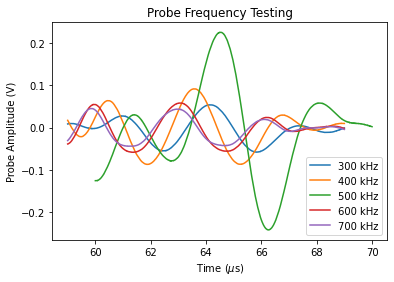

In [105]:
import pandas as pd

df_3 = pd.read_csv('Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/300kHz/2021-07-23/Trial1/10.0V/pr0.csv')
df_4 = pd.read_csv('Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/400kHz/2021-07-25/Trial1/10.0V/pr0.csv')
df_5 = pd.read_csv('Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/2021-04-09/Trial1/10.0V/pr0.csv') # original run was at 500 kHz
df_6 = pd.read_csv('Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/600kHz/2021-07-26_02/Trial1/10.0V/pr0.csv')
df_7 = pd.read_csv('Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/700kHz/2021-07-27/Trial1/10.0V/pr0.csv')

# Rename columns using indices
time3 = df_3.iloc[:,0]
voltage3 = df_3.iloc[:,1]
time4 = df_4.iloc[:,0]
voltage4 = df_4.iloc[:,1]
time5 = df_5.iloc[:,0]
voltage5 = df_5.iloc[:,1]
time6 = df_6.iloc[:,0]
voltage6 = df_6.iloc[:,1]
time7 = df_7.iloc[:,0]
voltage7 = df_7.iloc[:,1]

plt.plot(time3*1e6,voltage3,label="300 kHz")
plt.plot(time4*1e6+8e-4,voltage4,label="400 kHz")
plt.plot(time5*1e6,voltage5,label="500 kHz")
plt.plot(time6*1e6,voltage6,label="600 kHz")
plt.plot(time7*1e6,voltage7,label="700 kHz")

plt.legend()
plt.xlabel("Time ($\mu$s)")
plt.ylabel('Probe Amplitude (V)')
plt.title('Probe Frequency Testing')

#### f3,FT3 = myfft(time3,voltage3) 
f4,FT4 = myfft(time4,voltage4)
f5,FT5 = myfft(time5,voltage5)
f6,FT6 = myfft(time6,voltage6)
f7,FT7 = myfft(time7,voltage7)

plt.plot(f3,np.abs(FT3)/max(np.abs(FT3)), label="300 kHz")
plt.plot(f4,np.abs(FT4)/max(np.abs(FT4)), label="400 kHz")
plt.plot(f5,np.abs(FT5)/max(np.abs(FT5)), label="500 kHz")
plt.plot(f6,np.abs(FT6)/max(np.abs(FT6)), label="600 kHz")
plt.plot(f7,np.abs(FT7)/max(np.abs(FT7)), label="700 kHz")
plt.xlim([0,1500])
plt.legend(title='Input Frequency:')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('FFT of Probe Output')
plt.savefig("Motivation_data.jpeg",dpi=300)

In [ ]:
Peak = abs(f7[np.argmax(abs(FT7))]) 

Text(0.5, 1.0, 'Pump Frequency Testing')

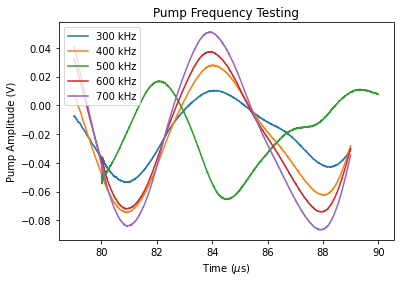

In [106]:
df_3pu = pd.read_csv('Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/300kHz/2021-07-23/Trial1/10.0V/pu20.csv')
df_4pu = pd.read_csv('Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/400kHz/2021-07-25/Trial1/10.0V/pu20.csv')
df_5pu = pd.read_csv('Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/2021-04-09/Trial1/10.0V/pu20.csv') # original run was at 500 kHz
df_6pu = pd.read_csv('Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/600kHz/2021-07-26_02/Trial1/10.0V/pu20.csv')
df_7pu = pd.read_csv('Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/700kHz/2021-07-27/Trial1/10.0V/pu20.csv')

# Rename columns using indices
time3pu = df_3pu.iloc[:,0]
voltage3pu = df_3pu.iloc[:,1]
time4pu = df_4pu.iloc[:,0]
voltage4pu = df_4pu.iloc[:,1]
time5pu = df_5pu.iloc[:,0]
voltage5pu = df_5pu.iloc[:,1]
time6pu = df_6pu.iloc[:,0]
voltage6pu = df_6pu.iloc[:,1]
time7pu = df_7pu.iloc[:,0]
voltage7pu = df_7pu.iloc[:,1]

plt.plot(time3pu*1e6,voltage3pu,label="300 kHz")
plt.plot(time4pu*1e6,voltage4pu,label="400 kHz")
plt.plot(time5pu*1e6,voltage5pu,label="500 kHz")
plt.plot(time6pu*1e6,voltage6pu,label="600 kHz")
plt.plot(time7pu*1e6,voltage7pu,label="700 kHz")

plt.legend()
plt.xlabel("Time ($\mu$s)")
plt.ylabel('Pump Amplitude (V)')
plt.title('Pump Frequency Testing')